# Chapter 2. Nucleation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Homogeneous nucleation

Nucleation phenomenon exist in a variety of physical processes such as solidification, diffusion-driven, solid-state phase transitions,crystalization from amorphous solids etc. Normally, there is a free energy differnece between the two states, which acts as the driving force for the reaction/phase transition. Therefore, such a process leads to a decrease of the volumetric free energy. However, there is an surface energy penality associated with the increase of the surface area. Hence, the energetics of the nucleation is the competition between the volumetric free energy, and the surface energy. Here we write down the nucleation energy as a function of the nuclei size:

$$ G_{nucleation} =\frac{4}{3} \pi r^3\times\Delta G + 4\pi r^2 \times \gamma,  $$

where $\Delta G$ is the free energy difference (energy per unit volume, e.g. $J/cm^3$) between the new phase and the parent phase and is usually negative. $\gamma$ is the surface energy (energy per unit area,e.g. $J/cm^2$) associated with the interface created by the phase transition, which is positive. Thus, the energy gain by nucleating a spherical nuclei with a radius $r$ is the battle between the two terms, leading to a non-monotomic relationship. The implication is that there is an energy barrier (maximum value of $G_{nucleation}$) to overcome before the transition can occur spontaneously.

$$E_{barrier} = \frac{16 \pi \gamma^3}{3\Delta G^2}, $$

Respectively, it corresponds to a critical nuclei size $r_c$

$$r_c = -\frac{2\gamma}{\Delta G}. $$

For a thermal-activated process, such a barrier can be overcome by thermal fluctuation, which can be a random event. Therefore, one can imagine a process with a huge barrier will be much more difficult to be activated, or in other words, requires more work.

### Example
Solidification of face center cubic solid copper from its melt. In this case, $\Delta G$ = $-\Delta H_{fusion}$ = -1680 $J/cm^3$, is the melting enthalpy of copper, $\gamma$ = 177 $J/cm^2$. We can evaluate the homogeneous nucleation process of copper crystal from the melt using the above mentioned equations. 


<IPython.core.display.Javascript object>


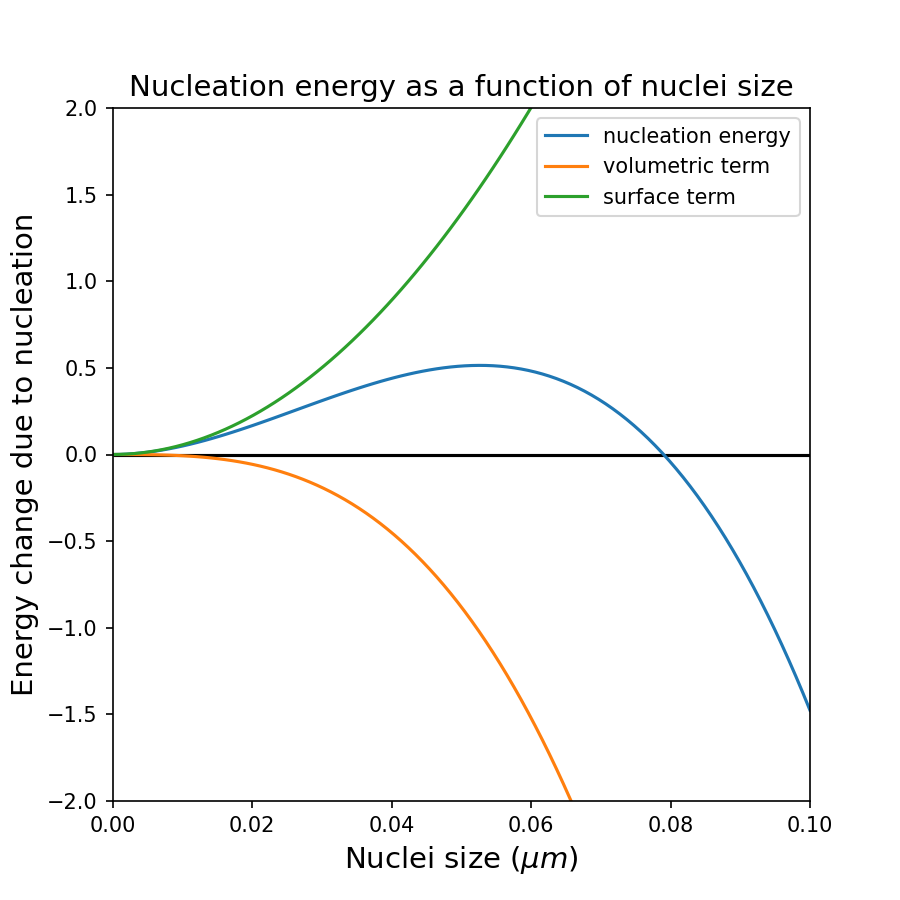

In [7]:
# unit: deltaG = J/cm^3; gamma=J/cm^2
r = np.linspace(0,0.1,100)
deltaG = -1680
gamma = 177 

G_nucleation = deltaG*(4/3)*np.pi*r**3+gamma*np.pi*r**2
G_vol = deltaG*(4/3)*np.pi*r**3
G_sur = gamma*np.pi*r**2
rc = -2*gamma/deltaG

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(r,G_nucleation,label = "nucleation energy")
ax.plot(r,G_vol, label = "volumetric term")
ax.plot(r,G_sur,label = "surface term")
ax.set_title("Nucleation energy as a function of nuclei size",fontsize=14)
ax.set_xlabel('Nuclei size ($\mu m$)',fontsize=14)
ax.set_ylabel('Energy change due to nucleation',fontsize=14)
ax.hlines(0,0,0.1,colors='k')
ax.vlines(-2*gamma/deltaG,-2,np.max(G_nucleation),colors='k',linestyle='--')
ax.set_xlim(0,0.1)
ax.set_ylim(-2,2)
plt.legend()
plt.show()

In [3]:
import ipywidgets as widgets
from ipywidgets import *

<IPython.core.display.Javascript object>


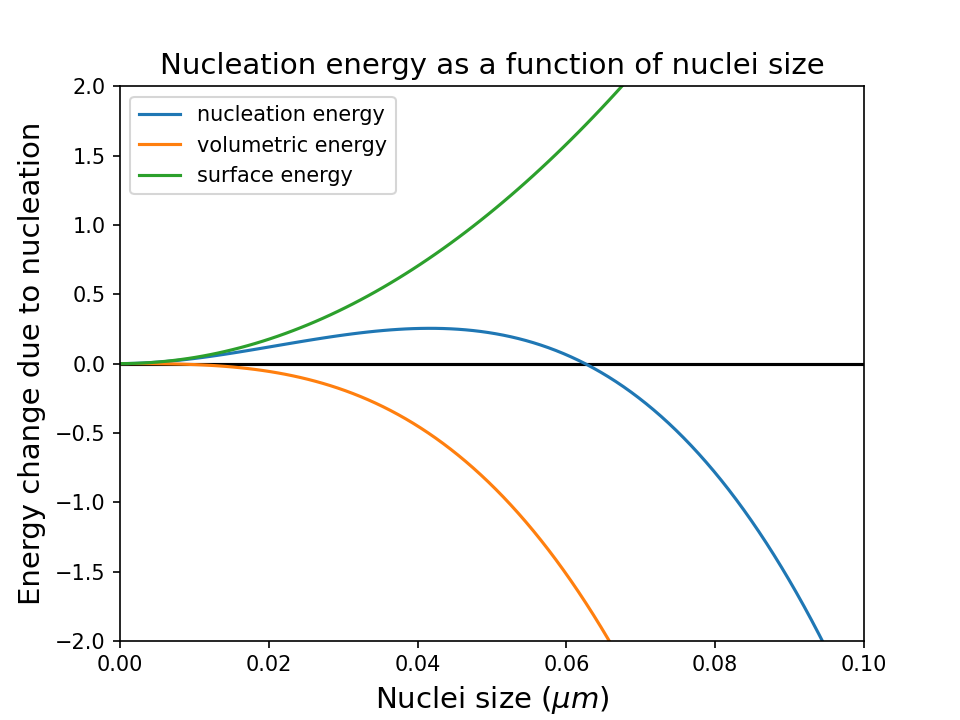

interactive(children=(IntSlider(value=100, description='gamma', max=300, min=-100), Output()), _dom_classes=('…

In [9]:
%matplotlib notebook
# unit: deltaG = J/cm^3; gamma=J/cm^2
r = np.linspace(0,0.1,100)
deltaG = -1680
#gamma = np.linspace(0,1000,100) 

G_nucleation = deltaG*(4/3)*np.pi*r**3+gamma*np.pi*r**2
G_vol = deltaG*(4/3)*np.pi*r**3
G_sur = gamma*np.pi*r**2
rc = -2*gamma/deltaG
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(r,G_nucleation,label = "nucleation energy")
line2, = ax.plot(r,G_vol,label = "volumetric energy")
line3, = ax.plot(r,G_sur,label = "surface energy")
#line_2, = ax.vlines(rc,-2,np.max(G_nucleation),label="Critical nuclei size",linestyle = "--")

ax.set_title("Nucleation energy as a function of nuclei size",fontsize=14)
ax.set_xlabel('Nuclei size ($\mu m$)',fontsize=14)
ax.set_ylabel('Energy change due to nucleation',fontsize=14)
ax.hlines(0,0,0.1,colors='k')
ax.set_xlim(0,0.1)
ax.set_ylim(-2,2)
plt.legend()
plt.show()

def update(gamma = 100):
    line.set_ydata(deltaG*(4/3)*np.pi*r**3+gamma*np.pi*r**2)
    line2.set_ydata(G_vol)
    line3.set_ydata(gamma*np.pi*r**2)
    fig.canvas.draw()
interact(update);


#####TODO#####
##Fix vertical line update...###


### Real life example: excimer laser induced crystalliation of nanocrystalline silicon from amorphous matrix
One can apply a transient thermal treatment, for instance laser heating, to trigger crystalliation process in a metastable thin film. The grain size can be modified by tuning the temperature and time of the treatment. The image below shows real-life example of a nanoscale Si nuclei embedded in the amorphous matrix. Image taken from high resolution transmission electron microscope.
![image](Silicon_nuclei.png)

The "heart" in the center of the image shows an early stage of crystallization, the shape of the crystal presumably is determined by the surface energy anisotropy.


## Hetrogeneous nucleation